In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df=pd.read_csv("HousePrices.csv")
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,3.130000e+05,NaN,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5/2/2014 0:00,2.384000e+06,NaN,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,5/2/2014 0:00,3.420000e+05,NaN,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,5/2/2014 0:00,4.200000e+05,NaN,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5/2/2014 0:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,7/9/2014 0:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,7/9/2014 0:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,7/9/2014 0:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,7/10/2014 0:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4596 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [87]:
df.isnull().sum()

date             0
price            0
bedrooms         4
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [88]:
#bedrooms have null values so 
df["bedrooms"].fillna(df["bedrooms"].median(),inplace=True)
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [89]:
df["date"]=pd.to_datetime(df["date"])
df["year"]=df["date"].dt.year
df["month"]=df["date"].dt.month
df["day"]=df["date"].dt.day
df.drop("date",axis=1,inplace=True)



In [90]:
print(df.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country',
       'year', 'month', 'day'],
      dtype='object')


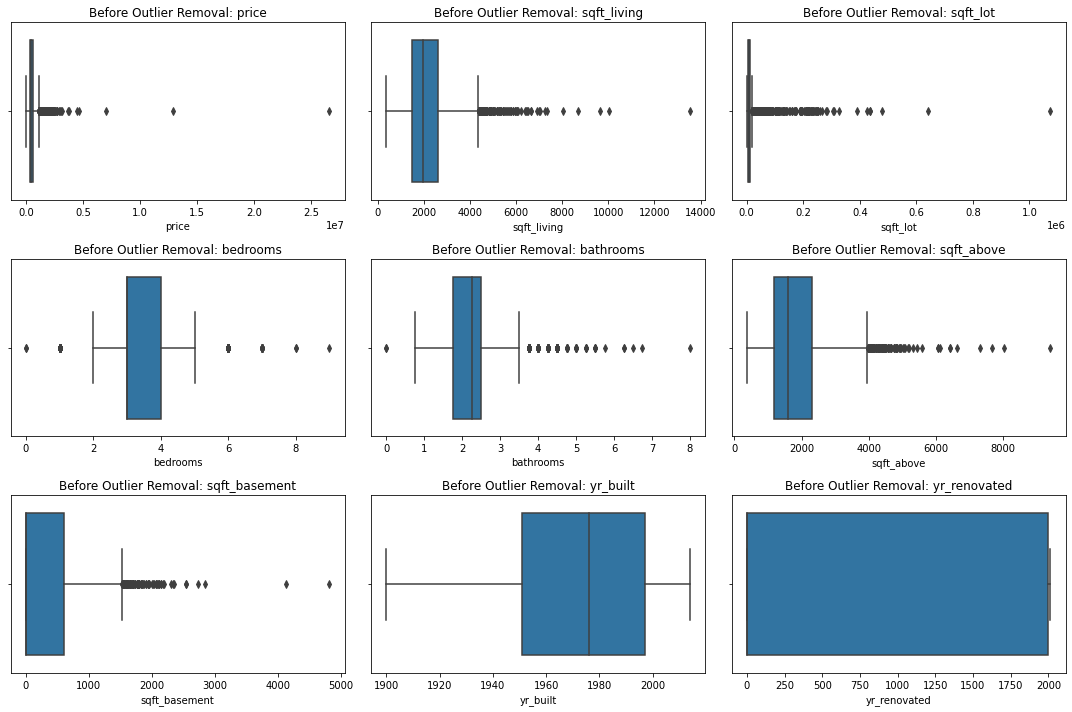

In [91]:
numeric_cols = ["price","sqft_living","sqft_lot","bedrooms","bathrooms",
                "sqft_above","sqft_basement","yr_built","yr_renovated"]

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols,1):
    plt.subplot(3,3,i)
    sns.boxplot(x=df[col])
    plt.title("Before Outlier Removal: " + col)

plt.tight_layout()
plt.show()


In [92]:
df = df[df["price"] < 3000000]          
df = df[df["sqft_living"] < 6500]        
df = df[df["sqft_lot"] < 200000]         
df = df[df["bedrooms"] < 9]
df = df[df["bathrooms"] < 7]
df = df[df["sqft_above"] < 6000]
df = df[df["sqft_basement"] < 3000]


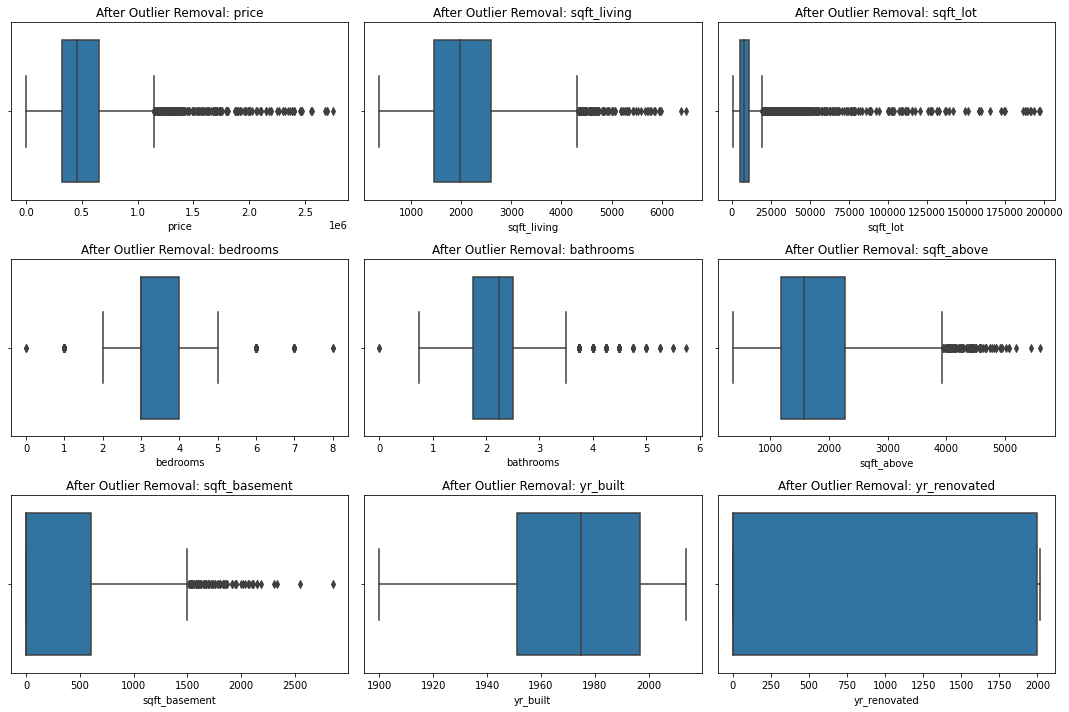

In [93]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols,1):
    plt.subplot(3,3,i)
    sns.boxplot(x=df[col])
    plt.title("After Outlier Removal: " + col)

plt.tight_layout()
plt.show()


In [94]:
df['zipcode'] = df['statezip'].str.extract(r'(\d+)', expand=False).astype(int)
df.drop("statezip", axis=1, inplace=True)


In [95]:
df.drop(["street", "country"], axis=1, inplace=True)


In [96]:

from sklearn.preprocessing import OneHotEncoder
df = pd.get_dummies(df, columns=["city"], drop_first=True)


In [97]:
print(df)

             price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     3.130000e+05       3.0       1.50         1340      7912     1.5   
1     2.384000e+06       3.0       2.50         3650      9050     2.0   
2     3.420000e+05       3.0       2.00         1930     11947     1.0   
3     4.200000e+05       3.0       2.25         2000      8030     1.0   
4     5.500000e+05       4.0       2.50         1940     10500     1.0   
...            ...       ...        ...          ...       ...     ...   
4595  3.081667e+05       3.0       1.75         1510      6360     1.0   
4596  5.343333e+05       3.0       2.50         1460      7573     2.0   
4597  4.169042e+05       3.0       2.50         3010      7014     2.0   
4598  2.034000e+05       4.0       2.00         2090      6630     1.0   
4599  2.206000e+05       3.0       2.50         1490      8102     2.0   

      waterfront  view  condition  sqft_above  ...  city_SeaTac  city_Seattle  \
0              0     0        

In [98]:
from sklearn.model_selection import train_test_split

X = df.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [100]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 118138.92903812333
MSE: 36353945082.447296
R2 Score: 0.6387071824439015


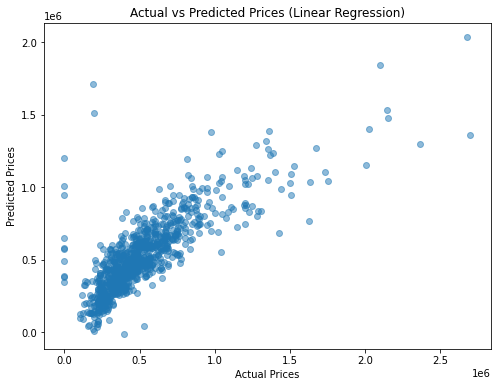

In [102]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Linear Regression)")
plt.show()


In [103]:
import joblib
joblib.dump(lr, "house_price_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X.columns, "model_columns.pkl")

['model_columns.pkl']